1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## 1.LOADING DATASET

In [2]:
titanic = pd.read_csv("C:/Users/Ammu/Downloads/titanic_dataset.csv")

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2. MAKING PASSENGERID AS INDEX

In [4]:
titanic = titanic.set_index('PassengerId')

In [5]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 3. BASIC DETAILS ON THE DATASET

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


From the above description, there are 3 columns with consider amount of empty values. There also seems to be an empty row in the dataset. 
The empty columns are, "Age"(Discrete), "Cabin", and "Embarked"(both Nominal);

## 4. MISSING VALUES

In [7]:
# drop the column, cabin cince a good percentage of data is missing.
titanic=titanic.drop('Cabin', axis=1)

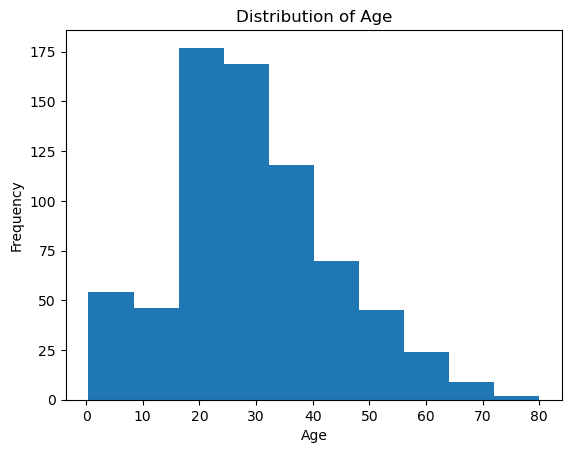

In [8]:
# check for skewness of the distribution of column, "Age"
plt.hist(titanic['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [9]:
# The histogram is approximately right-skewed; Fill missing values using median
titanic['Age']= titanic['Age'].fillna(titanic['Age'].median())

In [10]:
#import SimpleImputer package for imputing a value of central tendency instead of null values
from sklearn.impute import SimpleImputer

In [11]:
# To fill the categorical variable, "Embarked", use the mode of the column
imputer = SimpleImputer(strategy = 'most_frequent')

In [12]:
# Fill in missing values in the 'Embarked' column
titanic['Embarked'] = imputer.fit_transform(titanic[['Embarked']])

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


## 5. OUTLIERS HANDLING

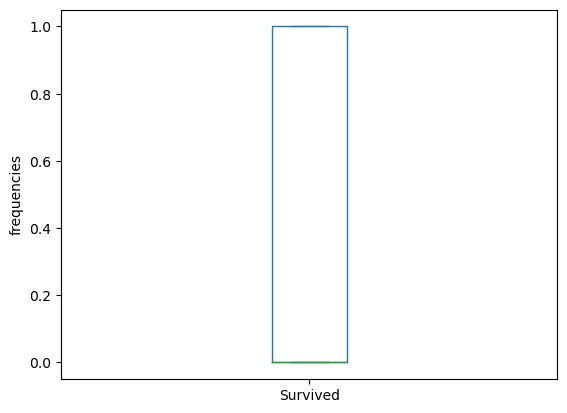

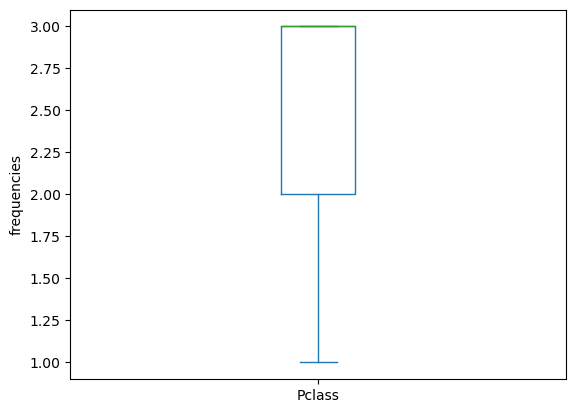

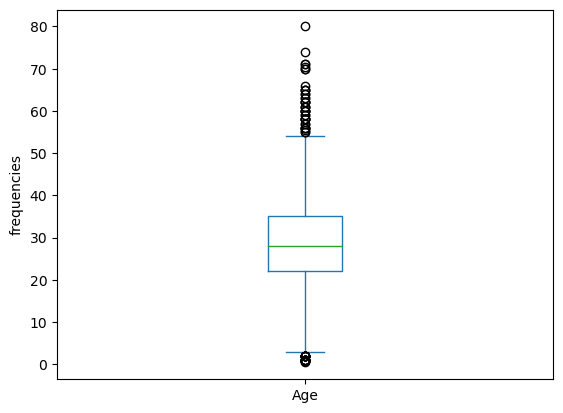

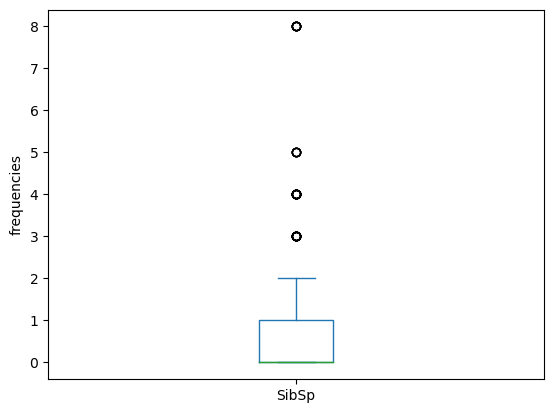

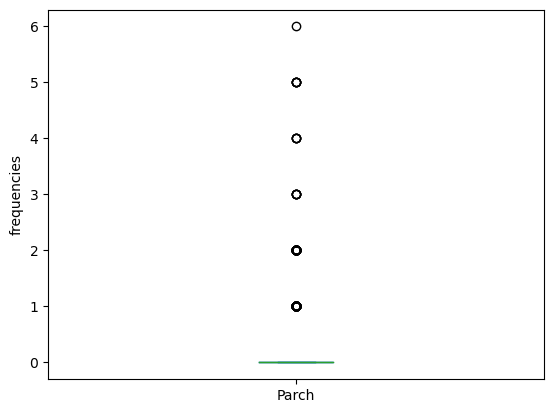

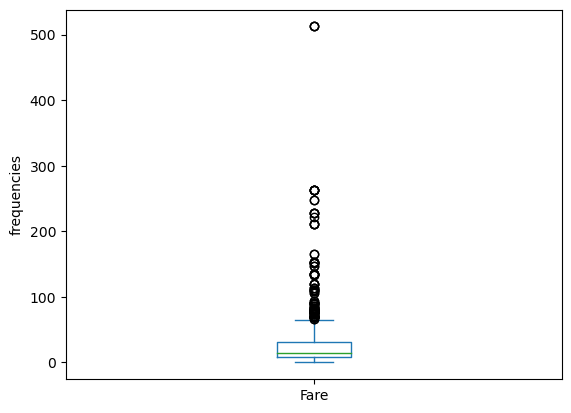

In [14]:
for i in titanic.columns:
    if titanic[i].dtypes!='O':
        titanic[i].plot.box()
        plt.ylabel('frequencies')
        plt.show()

In [15]:
# Calculate the z-scores for the column
z_scores = np.abs(zscore(titanic['Age']))

# Find the indices of outliers using a threshold (e.g., z-score > 3)
outlier_indices = np.where(z_scores > 3)[0]

#remove these values from titanic
titanic = titanic.drop(outlier_indices)

In [16]:
# Calculate the z-scores for the column
z_scores = np.abs(zscore(titanic['SibSp']))

# Find the indices of outliers using a threshold (e.g., z-score > 3)
outlier_indices = np.where(z_scores > 3)[0]

#remove these values from titanic
titanic = titanic.drop(outlier_indices)

In [18]:
# shape after removing outliers
titanic.shape

(855, 10)

## 6. MAX-MIN SCALING

In [20]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [21]:
titanic= titanic.drop(['Ticket','Name'], axis=1)

In [22]:
titanic = pd.get_dummies(titanic)

In [23]:
# Separate the target variable ('Survived') from the features
target = titanic['Survived']
features = titanic.drop('Survived', axis=1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform min-max scaling on the feature set
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Concatenate the scaled features and the target variable
scaled_data = pd.concat([scaled_features, target], axis=1)

# Check the scaled dataset
print(scaled_data.head())


   Pclass       Age  SibSp  Parch      Fare  Sex_female  Sex_male  Embarked_C  \
0     1.0  0.271174  0.125    0.0  0.014151         0.0       1.0         0.0   
1     0.0  0.472229  0.125    0.0  0.139136         1.0       0.0         1.0   
2     1.0  0.321438  0.000    0.0  0.015469         1.0       0.0         0.0   
3     0.0  0.434531  0.125    0.0  0.103644         1.0       0.0         0.0   
4     1.0  0.434531  0.000    0.0  0.015713         0.0       1.0         0.0   

   Embarked_Q  Embarked_S  Survived  
0         0.0         1.0       NaN  
1         0.0         0.0       0.0  
2         0.0         1.0       1.0  
3         0.0         1.0       1.0  
4         0.0         1.0       1.0  
